In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# reading the data 
df=pd.read_csv('Boston.csv')

In [4]:
# preprocessing
df=df.drop(columns=['Unnamed: 0'])
df.insert(0,'dummy',np.ones((df.shape[0])))

# splitting input and target variables
x=df.drop(columns=['medv'])
y=df['medv'].to_numpy()

# standardizing the data
x=StandardScaler().fit_transform(x)

In [5]:
df.head(1)

,dummy,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


### Linear regression implementation 

In [6]:
def predict(w,x):
    y_hat=np.dot(w,x)
    return y_hat

In [7]:
def derivative(w,x,y,ind):
    der=0
    
    # no of rows
    n=x.shape[0]
    
    # iterating through each row
    for i in range(n):
        term=(np.dot(w,x[i])-y[i])*x[i][ind]
        der+=term
    return der/n
    

In [8]:
def compute_loss(w,x,y):
    term=0
    n=x.shape[0]
    
    # iterating through rows
    for i in range(n):
        term+=(np.dot(w,x[i])-y[i])**2
    
    return term/(2*n)

In [106]:
# running Gradient Descent to fit

features_count=x.shape[1]

# initializing the weights with a random values
w_old=[np.random.randint(-50,50) for i in range(features_count)]
w_new=[0 for i in range(features_count)]

eta=0.1
loss=[]
epochs=505
# iteration of GD
for p in range(epochs):
    
    # iterating through each weights
    for j in range(features_count):
        
        # computing the derivative wrt wj
        df=derivative(w_old,x,y,j)
            
        # skipping the updation of the weights  only if the derivative is not closer not 0
        if abs(df-0)<0.001:
            continue
        else:
            w_new[j]=w_old[j]-(eta*df)
            w_old[j]=w_new[j]
    
    # computing the loss
    loss.append(compute_loss(w_old,x,y))
    

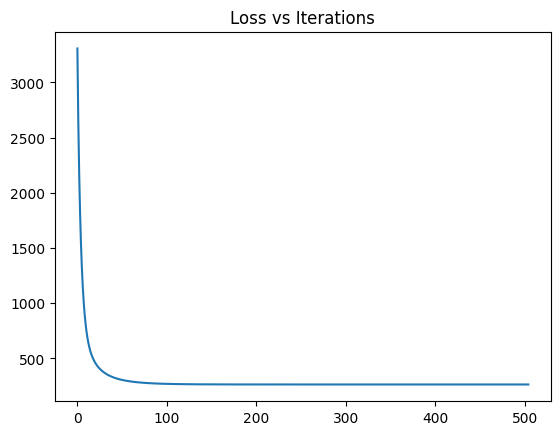

In [111]:
plt.title('Loss vs Iterations')
plt.plot(list(range(epochs)),loss)
plt.show()

In [108]:
# training model using sklearn's Linear regression
model=LinearRegression(fit_intercept=True)
model.fit(x,y)

LinearRegression()

In [109]:
# checking the weights given by the sklearn's implementation of  linear regression
print(model.coef_)

array([ 0.        , -0.92814606,  1.08156863,  0.1409    ,  0.68173972,
       -2.05671827,  2.67423017,  0.01946607, -3.10404426,  2.66221764,
       -2.07678168, -2.06060666,  0.84926842, -3.74362713])

In [110]:
# checking the weights given by our raw implementation of linear regression
print(w_old)

[0,
 -0.9326951411474396,
 1.087454248958769,
 0.1518001872221916,
 0.6794133520404992,
 -2.0657615306769483,
 2.67070507349166,
 0.022455243705241677,
 -3.108901487944744,
 2.6891973667134543,
 -2.1046266262513442,
 -2.063943369872637,
 0.8481583657341835,
 -3.7431627069470865]

As you can see above the weights given by both models are almost the same